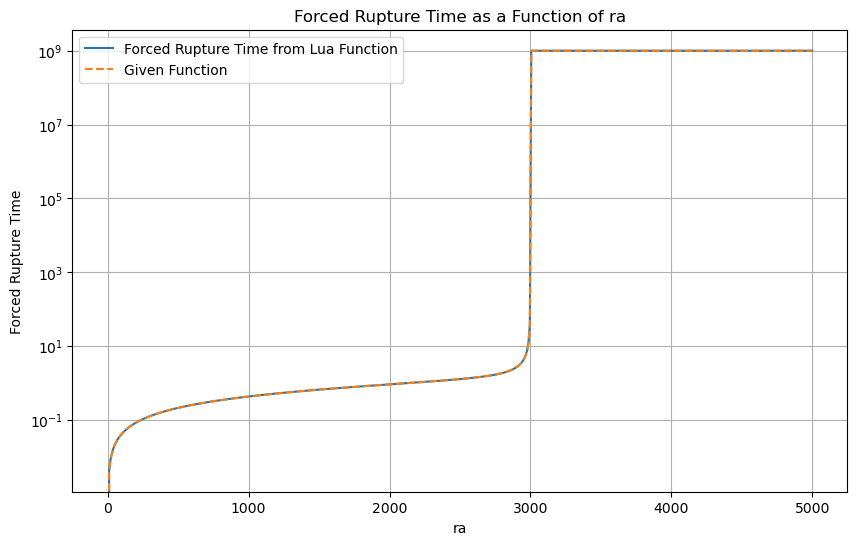

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def forced_rupture_time_from_ra(ra):
    r_crita = 3000.0
    Vs = 3464.0
    if ra <= r_crita:
        forced_rupture_time = ra / (0.7 * Vs) + (0.081 * r_crita / (0.7 * Vs)) * (1.0 / (1.0 - (ra / r_crita)**2) - 1.0)
    else:
        forced_rupture_time = 1000000000.0
    return forced_rupture_time

# Generate ra values from 0 to 5000
ra_values = np.linspace(0, 5000, 500)
forced_rupture_time_values_ra = [forced_rupture_time_from_ra(ra) for ra in ra_values]

# Calculate values for the given function
def given_function(ra):
    r_crita = 3000.0
    Vs = 3464.0
    if ra < r_crita:
        T = ra / (0.7 * Vs) + (0.081 * r_crita / (0.7 * Vs)) * (1.0 / (1.0 - (ra / r_crita)**2) - 1.0)
    else:
        T = 1.0e9
    return T

given_function_values = [given_function(ra) for ra in ra_values]

# Plot both functions
plt.figure(figsize=(10, 6))
plt.plot(ra_values, forced_rupture_time_values_ra, label='Forced Rupture Time from Lua Function')
plt.plot(ra_values, given_function_values, label='SCEC Forced Rupture time', linestyle='--')
plt.xlabel('ra')
plt.ylabel('Forced Rupture Time')
plt.title('Forced Rupture Time as a Function of ra')
plt.yscale('log')  # Use logarithmic scale for better visualization
plt.grid(True)
plt.legend()
plt.show()
